The notebook for this post can be found [here](https://github.com/pvonglehn/data-science-concepts/blob/master/gradient_descent_from_scratch.ipynb)

Gradient descent is one of the most importand and widespread optimization algorithms used in Machine Learning. It can be used to optimize function parameters such as the weights in a neural network or decision boundaries in support vector machine classifiers. 

The goal of this tutorial is to dive into the gradient descent algorithm by using it to optimize parameters in a very simple model. We will use a univariate linear regression model without offset (i.e. a straight line through origin) to model some data generated from a linear model with gaussian noise.

## An overview of the algorithm

The goal of gradient descent is to minimize a loss function. This loss function will measure how well the model fits the data, but it could also contain a regularization term to prevent overfitting. There are various choices for loss functions but they are all functions of the model parameters $\theta$, the training set $\{(x_i,y_i), i = 1,2,3...n\}$ and regularization parameters (if used). 

$$\frac{\partial J(\theta)}{\partial \theta} = 0$$


### The gradient descent algorithm pseudocode
><ul style="list-style-type:none;">
    <li>
        initialize parameters $\theta_{init}$
    </li>
    <li >
        while convergence not reached:
        <ul style="list-style-type:none;">
            <li>
                calculate gradients $\nabla_{\theta} J(\theta)$ 
            </li>
            <li>
                update parameters $\theta_{new} = \theta_{old} - \eta.\nabla_{\theta} J(\theta)$
            </li>
        </ul>
    </li>
</ul>


In practice it is often preferred to use variants of the gradient descent algorithm such as stochastic gradient descent (SGD) and mini-batch gradient descent which have several advantages such as being much more computationally efficient when working with large data sets as the gradient for each data point is not calculated at every step.


# Our example

## Generate data 

First we will generate n data points according to the following formula:
>$ y_i = \theta.x_i + w_i $ 
  
$\theta$ is randomly generated from a uniform distribution between 0 and 1  
$w_i$ is a gaussian noise term



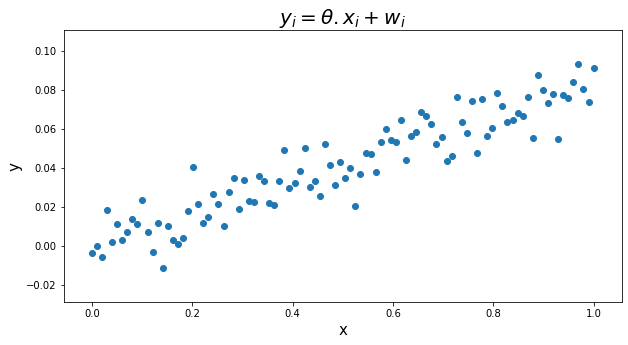

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n = 100):
    '''generate n data points from linear model through origin with gaussian noise'''
    
    X = np.linspace(0,1,n)
    true_theta = np.random.random()
    standard_dev = true_theta/10
    noise = np.random.normal(loc=0.0, scale=standard_dev,size=n)
    Y = X*true_theta + noise
    
    return X, Y, true_theta

def plot_data(X,Y):
    '''plot generated data'''
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(X,Y,label="original data")
    ax.set_xlabel("x",fontsize=15)
    ax.set_ylabel("y",fontsize=15)
    ax.set_title(r"$ y_i = \theta.x_i + w_i $",fontsize=20)

# Generate data
X, Y, true_theta = generate_data(n = 100)
plot_data(X,Y)

# Model

We will model the data with the following formula:
>$\hat y_i = \hat \theta.x_i$

Our objective is to find the value of $\hat \theta$ that minimizes the loss function.


### Half mean squared error loss function

We will use the half mean squared error loss function with no regularization term. Halving the mean squared error means that when me take the derivate we end up with a simpler functional form.

$$J(\theta) = \frac{1}{n}\sum_{i=1}^n \frac{(\hat \theta.x_i - y_i)^2}{2}$$



In [2]:
def loss_single(theta,x,y):
    '''calculate the loss the half squared error 
       with respect to a single training point'''
    
    return ((theta*x - y)**2)/2

def loss_batch(theta,X,Y):
    '''calculate the total loss over batch of data points'''
    n = X.shape[0]
    losses = np.zeros(n)
    for i, (x,y) in enumerate(zip(X,Y)):
        losses[i] = loss_single(theta,x,y)
    
    return losses.sum()

### Gradient of the loss function
$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{n}\sum_{i=1}^n (\hat \theta.x_i - y_i).x_i$$

In [3]:
def gradient_single(theta,x,y):
    '''calculate the gradient of the half squared error 
       with respect to a single training point'''
    
    return (theta*x - y)*x

def gradient_average(theta,X,Y):
    '''calculate the average gradient over batch of data points'''
    n = X.shape[0]
    gradients = np.zeros(n)
    for i, (x,y) in enumerate(zip(X,Y)):
        gradients[i] = gradient_single(theta,x,y)
    
    return gradients.sum()/n

### Update step

$$\theta_{new} = \theta_{old} - \eta.\frac{\partial J(\theta)}{\partial \theta}$$

In [4]:
def update_theta(theta,gradient,stepsize=0.1):
    '''update parameter theta based on the calculated gradient'''
    
    return theta - stepsize*gradient
    

### Full algorithm

Convergence criteria: if the gradient is within 0.001 of zero we will consider the algorithm to have converged

In [5]:
def full_gradient_descent(X,Y,theta=0,stepsize=0.1,max_iter=1000,convergence_eta=0.001):
    '''run gradient descent algorithm on all data points'''
    
    # keep track of loss at each step
    loss_history = list()
    loss = loss_batch(theta,X,Y)
    loss_history.append(loss)
    
    # keep track of theta at each step
    theta_history = list()
    theta_history.append(theta)
    
    gradient_history = list()
    
    for _ in range(max_iter):
        gradient = gradient_average(theta,X,Y)
        gradient_history.append(gradient)
        
        theta = update_theta(theta,gradient,stepsize)
        theta_history.append(theta)
        
        loss = loss_batch(theta,X,Y)
        loss_history.append(loss)

        # check for convergence
        if abs(gradient) < convergence_eta:
            break 
    else:
        raise Exception(f"Failed to converge in {max_iter} steps")
        
    return theta, theta_history, loss_history, gradient_history



### Run algorithm and plot results

In our example we can see that the loss decreases rapidly at first as large steps are taken at each iteration before converging to some small positive value while the gradient converges to 0.



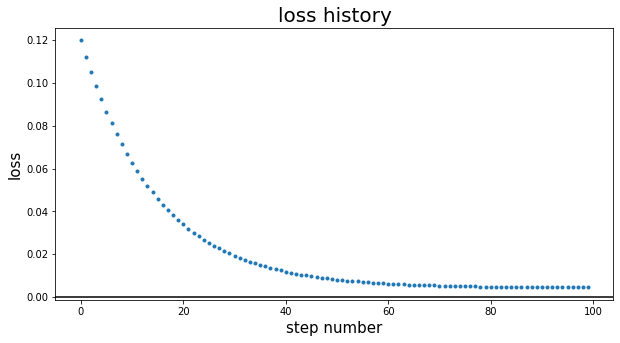

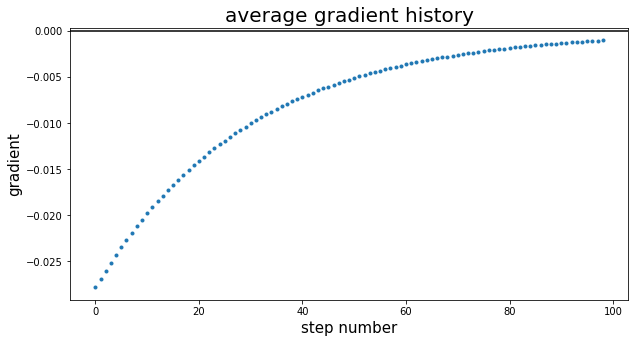

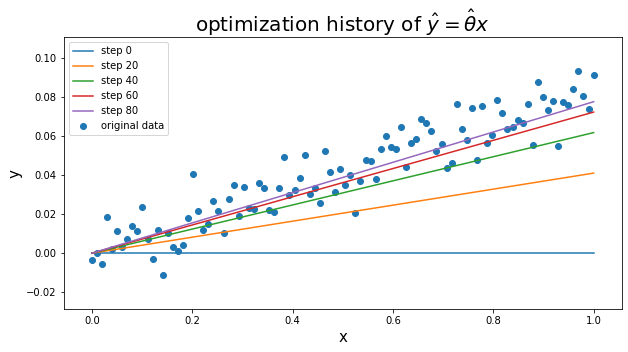

In [6]:
def plot_loss_history(X,Y,loss_history):
    '''plot evolution of theta'''
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.set_xlabel("step number",fontsize=15)
    ax.set_ylabel("loss",fontsize=15)
    ax.set_title(r"loss history",fontsize=20)
    ax.plot(loss_history,marker=".",linestyle="")
    ax.axhline(0,color="black")
    
def plot_theta_history(X,Y,theta_history):
    '''plot evolution of theta'''
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(X,Y,label="original data")
    ax.set_xlabel("x",fontsize=15)
    ax.set_ylabel("y",fontsize=15)
    ax.set_title(r"optimization history of $\hat y = \hat \theta x$",fontsize=20)
    for i in range(0,len(theta_history),20):
        ax.plot(X,theta_history[i]*X,label=f"step {i}")
        ax.legend()

def plot_gradient_history(X,Y,gradient_history):
    '''plot evolution of theta'''
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.set_xlabel("step number",fontsize=15)
    ax.set_ylabel("gradient",fontsize=15)
    ax.set_title(r"average gradient history",fontsize=20)
    ax.plot(gradient_history,marker=".",linestyle="")
    ax.axhline(0,color="black")
    
# Run algorithm
theta, theta_history, loss_history, gradient_history = full_gradient_descent(X,Y)
    
# Plot results
plot_loss_history(X,Y,loss_history)
plot_gradient_history(X,Y,gradient_history)
plot_theta_history(X,Y,theta_history)


### Final words

We have looked at the gradient descent algorithm in action for a very simple case. In practice you will usually want to optimize several parameters at the same time so you will be working with gradient vectors but this is conceptually very similar to what we have done here. 

With large data sets stochastic or mini batch gradient descent may be more appropriate.

Something to watch out for with the gradient descent algorithm is that there is no guarantee that the minimum reached will be a global minimum and not a local one. To help get round this issue it is often a good idea to rerun the algorithm several times with different randomly generated initial parameters.